In [80]:
%load_ext autoreload
%autoreload 2
%pylab inline
import pandas as pd
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/home/muncok/anaconda3/envs/pytorch/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [81]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [97]:
from honk_sv import model as mod
from honk_sv import train as train
from honk_sv import dataloader as dloader
from honk_sv import dataset as dset
from honk_sv import system as svs

In [119]:
data_df = pd.read_pickle("dataset/reddots/random_split_1.pkl")
data_dir = "/home/muncok/DL/dataset/SV_sets/reddots_r2015q4_v1/wav/"

In [25]:
all_spks = list(data_df.spk.unique())

# SI Train

In [26]:
si_train = data_df[data_df.set == 'si_train']
si_val = data_df[data_df.set == 'si_val']
si_test = data_df[data_df.set == 'si_test']
si_dfs = [si_train, si_val, si_test]

In [51]:
si_spks = list(si_train.spk.unique())

In [ ]:
model = "res8-wide"
global_config = dict(model=model, dataset="reddots",
                     no_cuda=False,  gpu_no=0,
                     n_epochs=100, batch_size=64,
                     lr=[0.01, 0.001], schedule=[np.inf], dev_every=1, seed=0, 
                     use_nesterov=False,
                     cache_size=32768, momentum=0.9, weight_decay=0.00001,
                     num_workers=32, print_step=100,
                     )

builder = train.ConfigBuilder(
                mod.find_config(model),
                dset.SpeechDataset.default_config(),
                global_config)
parser = builder.build_argparse()
si_config = builder.config_from_argparse(parser)

In [35]:
si_config['model_class'] = mod.find_model(model)
si_config['n_labels'] = len(si_spks)
si_model = si_config['model_class'](si_config)
si_config['output_file'] = "models/voxc/si_voxc_uttrs_res8w.pt"
print(si_model)

SpeechResModel (
  (conv0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (pool): AvgPool2d (size=[4, 3], stride=[4, 3], padding=0, ceil_mode=False, count_include_pad=True)
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
  (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn6): Batc

In [36]:
si_config['data_folder'] = data_dir
si_config['input_length'] = int(16000 * 4)  # 4 seconds
si_datasets = dset.SpeechDataset.read_df(si_config, [si_train, si_val, si_test])

In [38]:
si_loaders = dloader.get_loader(si_config, si_datasets)

In [39]:
train.set_seed(si_config)
train.train(si_config, loaders=si_loaders, model=si_model)

train step #99 accuracy: 1.0, loss: 0.16830110549926758


Process Process-61:
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
Process Process-46:
Process Process-49:
Process Process-58:
Process Process-40:
Process Process-57:
Process Process-48:
Process Process-52:
Process Process-60:
Process Process-55:
Process Process-42:
Process Process-56:


KeyboardInterrupt: 

Process Process-36:
Process Process-63:
Process Process-45:
Process Process-54:
Process Process-41:
Process Process-59:
Process Process-53:
Process Process-38:
Process Process-43:
Process Process-37:
Process Process-50:
Process Process-35:
Process Process-39:
Process Process-33:
Process Process-44:
Process Process-51:
Process Process-62:
Process Process-34:
Process Process-47:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last

  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/process.py

  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/queues.py", line 341, in get
    with self._rlock:
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/queues.py", line 341, in get
    with self._rlock:
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/queues.py", line 341, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/muncok/anaconda3/envs/pytorch/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
 

-------

# SV Test

#### SV Enrollment & Test

In [42]:
sv_enroll = data_df[data_df.set == 'sv_enroll']
sv_posdev = data_df[data_df.set == 'sv_posdev']
sv_negdev = data_df[data_df.set == 'sv_negdev']

In [56]:
enroll_spks = list(sv_enroll.spk.unique())
imp_spks = list(sv_negdev.spk.unique())
sv_spks = enroll_spks + imp_spks

In [54]:
model = "res8-wide"
global_config = dict(model=model, dataset="reddots",
                     no_cuda=False,  gpu_no=0,
                     n_epochs=100, batch_size=64,
                     lr=[0.01, 0.001], schedule=[np.inf], dev_every=1, seed=0, 
                     use_nesterov=False,
                     cache_size=32768, momentum=0.9, weight_decay=0.00001,
                     num_workers=32, print_step=100,
                     )

builder = train.ConfigBuilder(
                mod.find_config(model),
                dset.SpeechDataset.default_config(),
                global_config)
parser = builder.build_argparse()
sv_config = builder.config_from_argparse(parser)

In [59]:
sv_config['model_class'] = mod.find_model(model)
sv_config['n_labels'] = 1211 # match to loaded model
sv_model = sv_config['model_class'](sv_config)
sv_model.load("models/voxc/si_voxc_uttrs_res8w.pt")
print(sv_model)

SpeechResModel (
  (conv0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (pool): AvgPool2d (size=[4, 3], stride=[4, 3], padding=0, ceil_mode=False, count_include_pad=True)
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
  (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
  (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
  (conv3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn6): Batc

In [61]:
enroll_dfs = {}
for spk in enroll_spks:
    enroll_dfs[spk] = sv_enroll[sv_enroll.spk==spk]

In [102]:
sv_config['data_folder'] = data_dir
sv_config['input_length'] = int(16000 * 4)  # 4 seconds

In [106]:
spk_models = dict()
for spk in enroll_spks:
    enroll_dataset = dset.SpeechDataset.read_df(sv_config, [None, None, enroll_dfs[spk]])
    _,_,enroll_loader = dloader.get_loader(si_config, enroll_dataset)
    spk_models[spk] = svs.enroll_uttr(sv_config, model=sv_model, test_loader=enroll_loader)

In [107]:
spk_model = [v for k,v in spk_models.items()]

In [108]:
from scipy.spatial.distance import cosine
import itertools

for spk1, spk2 in itertools.combinations(enroll_spks,2):
    score = 1-cosine(spk_models[spk1], spk_models[spk2])
    print("{}, {}: {:.2f}".format(spk1, spk2, score))

m0056, m0035: 0.20
m0056, m0025: 0.23
m0056, m0030: 0.47
m0056, m0063: 0.55
m0035, m0025: 0.38
m0035, m0030: -0.02
m0035, m0063: 0.43
m0025, m0030: 0.20
m0025, m0063: 0.39
m0030, m0063: 0.42


In [109]:
def pairwise_cosine(spk_model, test_in):
    nb_enroll_spks = len(spk_models.keys())
    scores = np.zeros(nb_enroll_spks)
    for i in range(nb_enroll_spks):
        signature = spk_model[i]
        scores[i] = 1-cosine(test_in, signature)
    return scores

In [120]:
corrects = 0
for idx, row in sv_posdev.iterrows():
    audio_path = os.path.join(data_dir, row.spk, row.file)
    emb = svs.embed(si_config, si_model, audio_path)
    pred_spk = np.argmax(pairwise_cosine(spk_model, emb))
    label = enroll_spks.index(row.spk)
    if pred_spk == label:
        corrects += 1

print("SI Acc: {}".format(corrects/ len(sv_posdev)))

SI Acc: 0.23529411764705882


In [122]:
nb_total_uttrs = len(sv_posdev)+len(sv_negdev)
n_classes = len(enroll_spks)
score_vector = np.zeros((nb_total_uttrs, n_classes))
label_vector = np.zeros((nb_total_uttrs, n_classes))

spk_model = [v for k,v in spk_models.items()]
spk_labels = list(spk_models.keys())

i = 0
for idx, row in sv_posdev.iterrows():
    audio_path = os.path.join(data_dir, row.spk, row.file)
    emb = svs.embed(si_config, si_model, audio_path)
    score_vector[i, :] = pairwise_cosine(spk_model, emb)
    label = spk_labels.index(row.spk)
    label_vector[i, label] = 1
    i+=1

In [124]:
for idx, row in sv_negdev.iterrows():
    audio_path = os.path.join(data_dir, row.spk, row.file)
    emb = svs.embed(si_config, si_model, audio_path)
    score_vector[i, :] = pairwise_cosine(spk_model, emb)
    i+=1

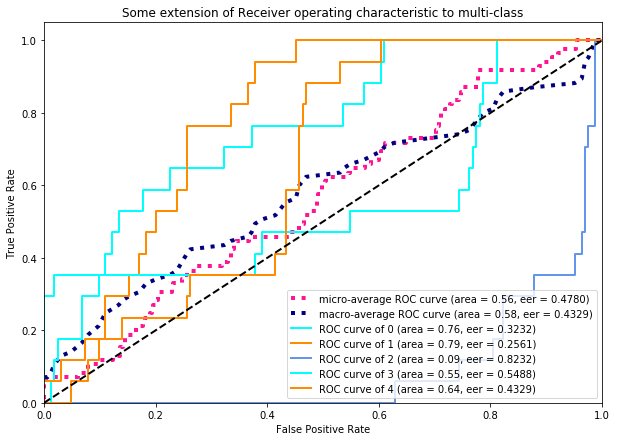

In [129]:
from honk_sv import draw_plot
draw_plot.plot_eer(score_vector, label_vector)